# Principal Components Analysis Exercise 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn

### Importa los datos

Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('nndb_flat.csv')

In [3]:
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


## Check for highly correlated features
¿Qué pasa con las columnas USRDA?

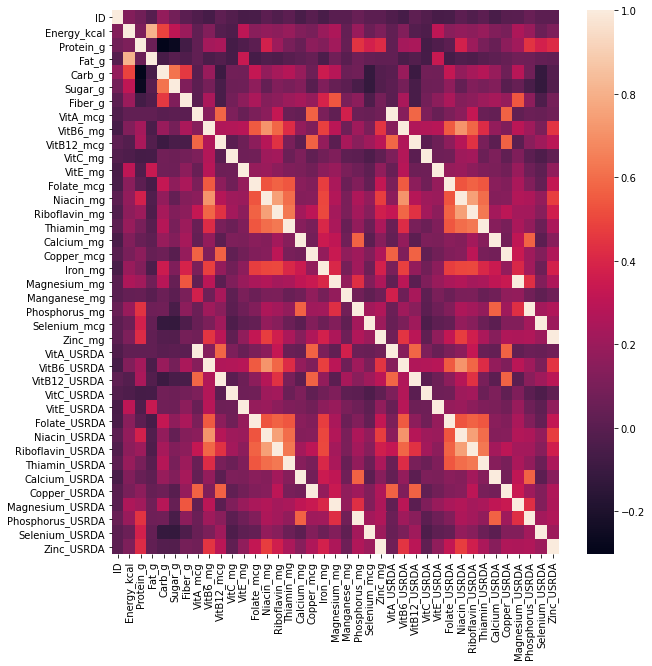

## We can see that the "_USRDA" features are redundant. They should be removed

In [6]:
data.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [7]:
data.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

## Separate non-numeric features

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

## Explore the datas' distributions

## Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Box-Cox

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema.

(df = df + 1)

In [12]:
data.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

from scipy import stats

new_data = pd.DataFrame()

l, opt_lambda = stats.boxcox(np.array(data.Energy_kcal)[~(np.isnan(np.array(data.Energy_kcal)))])
print('Optimal lambda value:', opt_lambda)

new_data['Energy_kcal_lambda_opt'] = stats.boxcox(data.Energy_kcal, lmbda=opt_lambda)

In [13]:
from scipy import stats


In [14]:
new_data.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.140152,0.0,...,0.031506,0.004927,3.186843,0.000000,0.019689,1.187185,0.000000,5.897452,0.674112,0.083954
1,28.218570,0.659887,3.902525,0.058330,0.057269,0.0,2.688245,0.002981,0.111836,0.0,...,0.031506,0.004927,3.186843,0.015185,0.142210,1.187185,0.003960,5.774520,0.674112,0.048072
2,30.599777,0.253858,4.059063,0.000000,0.000000,0.0,2.711488,0.000998,0.009878,0.0,...,0.004943,0.000997,1.601403,0.000997,0.000000,0.000000,0.000000,1.777189,0.000000,0.009920
3,21.085439,4.504850,3.087499,1.232397,0.360184,0.0,2.509633,0.120684,0.468905,0.0,...,0.191363,0.026682,6.150173,0.035193,0.249940,3.998436,0.008798,19.739039,2.458809,0.896741
4,21.527013,4.665389,3.113172,1.364671,0.365391,0.0,2.573502,0.056903,0.474341,0.0,...,0.183964,0.013442,6.384389,0.022202,0.323005,4.062188,0.011644,20.962339,2.458809,0.889206


## The data definitely "look" better

## To account for different scales of measurement, we'll standardize to mean=0, variance=1.

# Implement PCA

shape of X_pca (8618, 23)


#### check the most important components


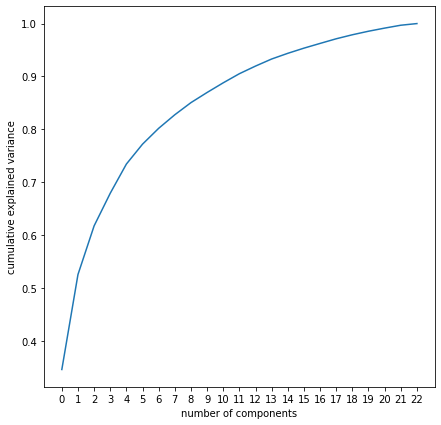

In [17]:
plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.xticks(np.arange(23));

[0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]


Observamos que los 5 primeros eigenvectors o "componentes" nos dan el 73% de varianza explicada: nos quedamos con ellas.  
Crearemos 5 nuevas categorías: C1, C2, C3, ...

,C1,C2,C3,C4,C5
0,-2.638414,-1.702513,1.283723,3.759630,-2.413708
1,-2.537931,-1.550464,1.279814,3.634116,-2.492733
2,-3.751335,-2.080190,2.067931,3.668214,-2.457260
3,2.000578,-1.361858,-0.395834,2.432986,-0.887857
4,1.582713,-1.321484,-0.238445,2.597706,-1.286362
...,...,...,...,...,...
8613,2.844598,-2.069960,-0.887864,2.410625,-1.280071
8614,0.273762,-2.042214,-1.414027,-0.765756,-0.660353
8615,-3.288600,0.689374,1.810231,-0.688036,1.138664
8616,1.781538,-0.735900,-1.999932,0.571141,-1.796434


## ¿Qué grupo de comida tiene los valores más altos en cada categoría?

,FoodGroup,ShortDescrip,Descrip,C1,C2,C3,C4,C5
8613,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",2.844598,-2.069960,-0.887864,2.410625,-1.280071
8614,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",0.273762,-2.042214,-1.414027,-0.765756,-0.660353
8615,Sweets,"SYRUP,CANE","Syrup, Cane",-3.288600,0.689374,1.810231,-0.688036,1.138664
8616,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",1.781538,-0.735900,-1.999932,0.571141,-1.796434
8617,Finfish and Shellfish Products,"TURTLE,GREEN,RAW","Turtle, green, raw",1.210574,-1.204741,-2.169514,0.651832,-0.653954


C1
4454    Beverages
4190    Beverages
7659       Snacks
Name: FoodGroup, dtype: object


C2
253                      Spices and Herbs
268                      Spices and Herbs
3265    Vegetables and Vegetable Products
Name: FoodGroup, dtype: object


C3
7811    Baked Products
7892    Baked Products
7882    Baked Products
Name: FoodGroup, dtype: object


C4
786    Fats and Oils
721    Fats and Oils
716    Fats and Oils
Name: FoodGroup, dtype: object


C5
1983    Breakfast Cereals
2160    Breakfast Cereals
2006    Breakfast Cereals
Name: FoodGroup, dtype: object


